#  Video Games Sales Comparison
     
In this project I'm seeking insights from the data set which I've taken from [kaggle](https://www.kaggle.com/gregorut/videogamesales).\
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include;

1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales


## Reviewing Data

In [2]:
import pandas as pd
import os

In [3]:
os.listdir()

['environment-macos.yml',
 '.jovianrc',
 'mario.jpg',
 'environment.yml',
 '.ipynb_checkpoints',
 'vgsales.csv',
 'environment-linux.yml',
 'zerotopandas-course-project.ipynb']

In [4]:
sales_raw_df=pd.read_csv('vgsales.csv')
sales_raw_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Data set consists of 11 columns and 16598 rows,in this project I'll mostly focus on the changes in the global sales considering year,publisher,game and genre.Let's review data using pandas info and describe functions.Here you can see some statistical values of the numerical columns.

In [5]:
sales_raw_df.info()
sales_raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
sales_raw_df.Name.value_counts()

Need for Speed: Most Wanted                  12
Madden NFL 07                                 9
Ratatouille                                   9
FIFA 14                                       9
LEGO Marvel Super Heroes                      9
                                             ..
Super Army War                                1
Naruto Shippuden: Gekito Ninja Taisen! EX     1
Lise no Atelier: Ordre no Renkinjutsushi      1
inFAMOUS: Second Son                          1
Star Wars Episode I Racer                     1
Name: Name, Length: 11493, dtype: int64

**Since the length returned is equal to 11493 and the total number of rows is equal to 16598,we can see that some games were mentioned multiple times since they were realised in multiple years.**

## Exploratory Analysis and Visualization

In this section we will be searching for insights from the columns of the data frame.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
#get a little future error warning
import warnings
warnings.filterwarnings('ignore')

## Sale Comparison Between Genres

Lets take the genre column and see change in the sales with respect to genre.

In [10]:
sales_raw_df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Pandas unique function gives us the unique values in the series.You can see that the data frame consists of 12 different game genres.

In [11]:
genres_df=sales_raw_df.copy().groupby('Genre').sum()
genres_df.drop(columns=['Year','Rank'],inplace=True)
genres_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Adventure,105.80,64.13,52.07,16.81,239.04
Fighting,223.59,101.32,87.35,36.68,448.91
Misc,410.24,215.98,107.76,75.32,809.96
Platform,447.05,201.63,130.77,51.59,831.37
Puzzle,123.78,50.78,57.31,12.55,244.95
Racing,359.42,238.39,56.69,77.27,732.04
Role-Playing,327.28,188.06,352.31,59.61,927.37
Shooter,582.60,313.27,38.28,102.69,1037.37


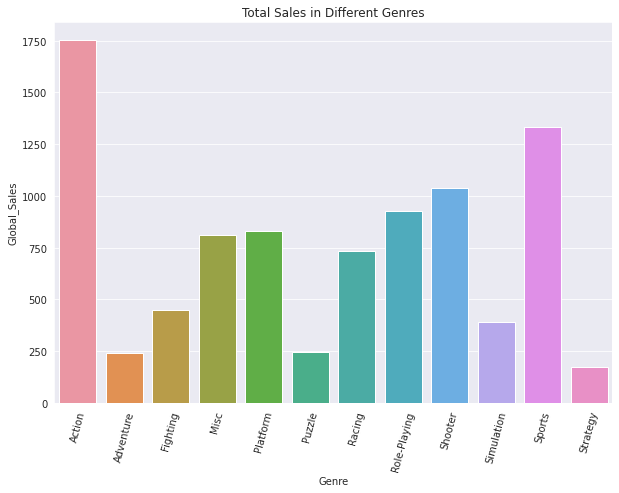

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.xticks(rotation=75)
plt.title('Total Sales in Different Genres')
sns.barplot(genres_df.index, genres_df.Global_Sales);

As you can see the action genre is the favourite,after comes the sports genre,strategy-puzzle and adventure games are seem to be chosed less by the users.So we can say games that stimulates more adrenalin is funier for the users.You can check [quora](https://www.quora.com/Why-are-action-games-more-popular-than-simulation-games) to understand the reasons of this behaviour.

## Total Sale Comparison According to Years

Data frame let us see the video game sells in the last 40 years, let's compare sales with respect to years.

In [13]:
years_df=sales_raw_df[['Year','Global_Sales']].groupby('Year').sum()

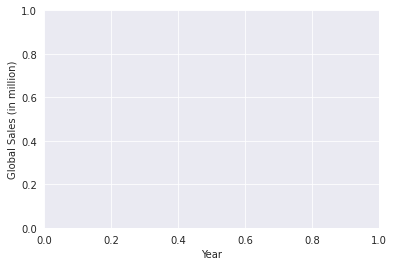

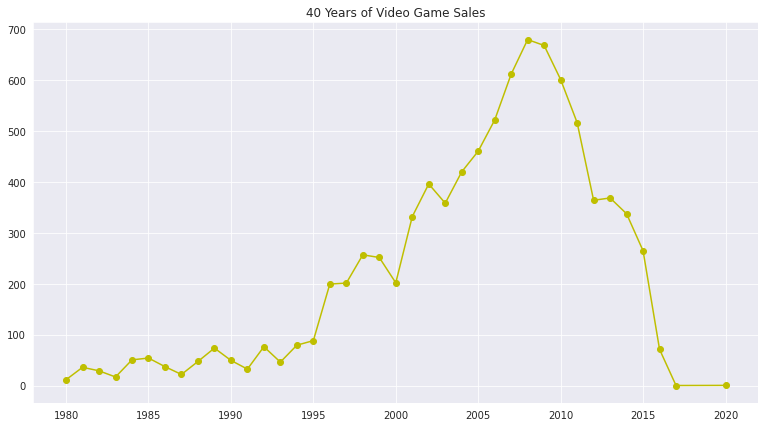

In [14]:
plt.xlabel('Year')
plt.ylabel('Global Sales (in million)')
plt.figure(figsize=(13,7))
plt.title("40 Years of Video Game Sales")
plt.plot(years_df.index,years_df, 'y-o');

**Graph shows that after 2008 video game sales dropped drastically,with computers getting cheaper and realise of other free games such as mmorpgs-mobile games, the industry started to change and developed different games to acquire more players.The graph also shows there is no information about the sales in 2018 & 2019.**

## Top Games 


In [15]:
name_list=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

**The graph below demonstrates the games that were bought mostly in the last 10 years.**

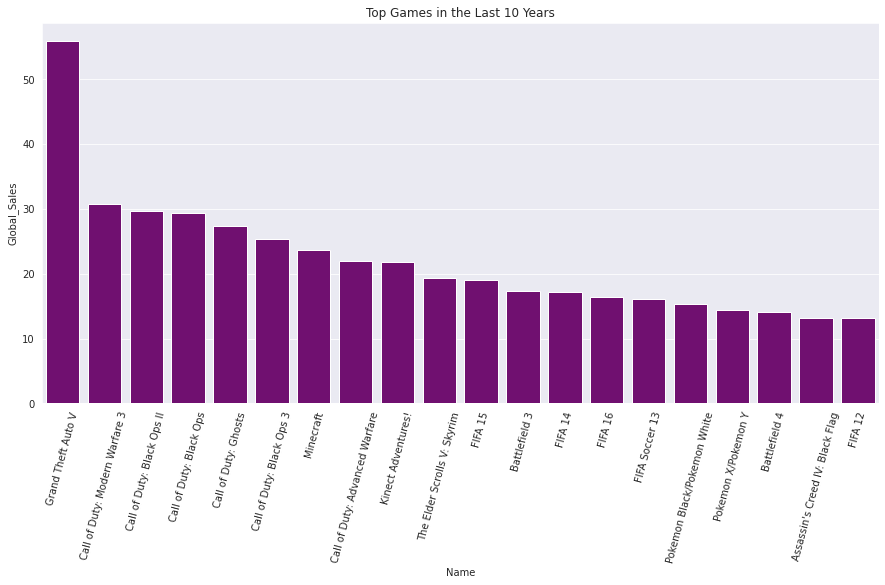

In [16]:
sales_df=sales_raw_df[sales_raw_df.Year>=2010].groupby('Name')[name_list].sum()
top20=sales_df.sort_values('Global_Sales',ascending=False).head(20)
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
plt.title('Top Games in the Last 10 Years')
sns.barplot(top20.index, top20.Global_Sales,color='purple',edgecolor='w');

Here you can see even though GTA is the bestseller of the last 10 years,games with different distributions such as Call of Duty and FIFA have more sells in total.So creating a new version of the game keeps it up to date for the former players and they probably buy the latest versions afterwards.  

**And this graph demonstrates the top video games of the last 40 years.**

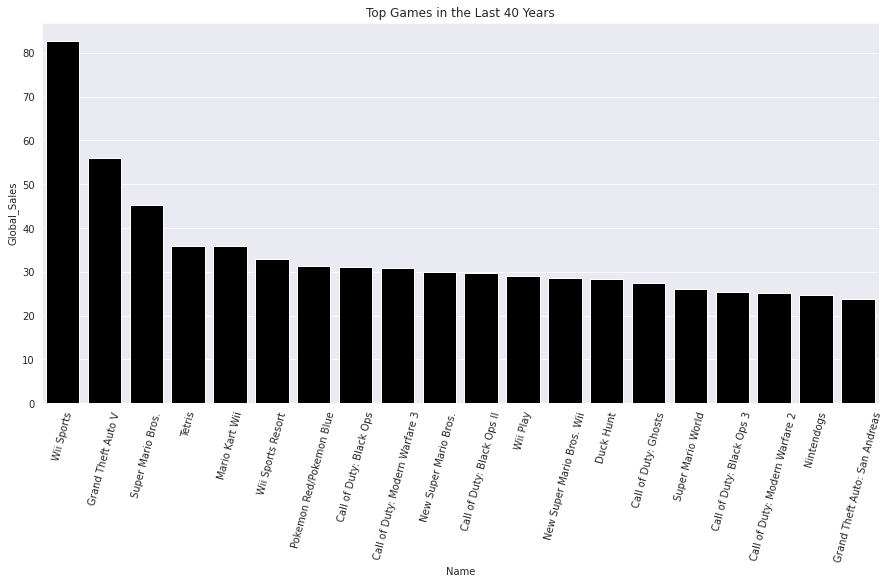

In [17]:
sales_df=sales_raw_df.groupby('Name')[name_list].sum().sort_values('Global_Sales',ascending=False).head(20)
plt.figure(figsize=(15,7))
plt.xticks(rotation=75)
plt.title('Top Games in the Last 40 Years')
sns.barplot(sales_df.index, sales_df.Global_Sales,color='black',edgecolor='w');

Comparing this two graphs we can say that Wii Sports-Super Mario-Tetris and similar older games lost their pace but they reached more sales in total which shows that the popularity of the video games is declining by time and new games will probably gain less growth as they reach to market.

## Distrubion of the Sales Between NA-EU Regions

NA-EU regions are the most selling markets according to the data frame.Let's compare the last 10 years sale stats of the top  games mentioned above between these regions in a scatter graph.

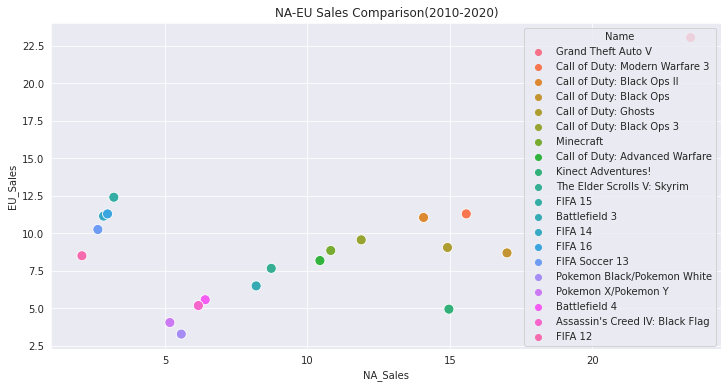

In [18]:
region_comp=top20[['NA_Sales','EU_Sales']]
plt.figure(figsize=(12, 6))
plt.title('NA-EU Sales Comparison(2010-2020)')

sns.scatterplot(region_comp.NA_Sales, 
                region_comp.EU_Sales, 
                hue=region_comp.index,
                s=100);

Graph shows that though there were times the total sales get quite close,FIFA is more popular in EU whereas other games take a bigger portion in NA region. It's no secret that football is more popular in Europe and American's prefer NFL over it,if we are to compare total sales we can say that NA has been a bigger market for the last 10 years. 

## Questions

Let's answer some questions that arise from the analysis we did above.

### Q1: Which Publisher reached the most number of sales and how many games were released by them?

In [19]:
sales_raw_df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Fields                             1
Intergrow                          1
Game Arts                          1
Nichibutsu                         1
id Software                        1
Name: Publisher, Length: 578, dtype: int64

**There are 11493 different games but only 578 publishers which means some publishers released more games then others.**

In [20]:
publishers_df=sales_raw_df.groupby('Publisher')[name_list].sum().sort_values('Global_Sales',ascending=False)
publishers_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...
Ongakukan,0.00,0.00,0.01,0.00,0.01
Commseed,0.00,0.00,0.01,0.00,0.01
Takuyo,0.00,0.00,0.01,0.00,0.01


In [21]:
sales_raw_df[sales_raw_df.Publisher=='Nintendo'].Name.value_counts()

Mario Tennis                    3
Monster Hunter Tri              3
Donkey Kong Country             3
LEGO City Undercover            2
Tetris Attack                   2
                               ..
Dynasty Warriors Advance        1
Donkey Kong Land III            1
Kobe Bryant in NBA Courtside    1
Excitebike 64                   1
Star Wars Episode I Racer       1
Name: Name, Length: 667, dtype: int64

**Ans1: Nintendo is the bestseller among the publishers, they've released 667 games in total.**

### Q2:Compare the platforms to see which one is mostly preferred by publishers and users in 10 year periods.

In [22]:
empty=pd.DataFrame(index=sales_raw_df.Platform.unique())
years={'1980':1990,'1990':2000,'2000':2010,'2010':2020}
for x in years:
    y=years[x]
    x=int(x)
    empty['{}-{}'.format(x,y)]=sales_raw_df[(sales_raw_df.Year >= x) & (sales_raw_df.Year < y)].groupby('Platform')['Global_Sales'].sum()
empty.fillna(0,inplace=True)
empty['Overall']=empty['1980-1990']+empty['1990-2000']+empty['2000-2010']+empty['2010-2020']
empty.sort_values('Overall',ascending=False)

,1980-1990,1990-2000,2000-2010,2010-2020,Overall
PS2,0.00,0.00,1227.36,6.10,1233.46
X360,0.00,0.00,412.65,556.96,969.61
PS3,0.00,0.00,346.91,602.44,949.35
Wii,0.00,0.00,677.48,232.33,909.81
DS,0.02,0.00,689.25,129.40,818.67
PS,0.00,586.85,140.54,0.00,727.39
GBA,0.00,0.00,313.56,0.00,313.56
PSP,0.00,0.00,227.44,64.27,291.71
PS4,0.00,0.00,0.00,278.10,278.10
PC,0.06,49.98,84.88,120.13,255.05


In this code I have created a new data frame which is indexed by the platform names,after in the for loop I have arranged four 10 year periods and selected total sale values for each corresponding platform.Lastly I have filled all the nan values with zero.

**Ans2:Here you can see between 1980-1990 NES,between 1990-2000 PS,between 2000-2010 PS2 and in the last decade X360 have taken the lead.NES didn't host any games in 00s whereas PS took over the market after 00s to be dethroned by X360 recently.But considering the overall sales it's clear that PS2 is still on top with it's phonemenal sales between 2000-2010.**

### Q3:What genre and platform must be chosen by the publishers to release a new game in Japanese market?

In [49]:
japan_df=sales_raw_df[(sales_raw_df.JP_Sales != 0.0) & (sales_raw_df.Year > 2010)][['Year','Genre','Platform','JP_Sales']]

In [64]:
allt_genres=japan_df.groupby('Genre').sum().drop(columns='Year')
allt_genres['Count']=japan_df['Genre'].value_counts()
allt_genres['Average']=allt_genres.JP_Sales/allt_genres.Count

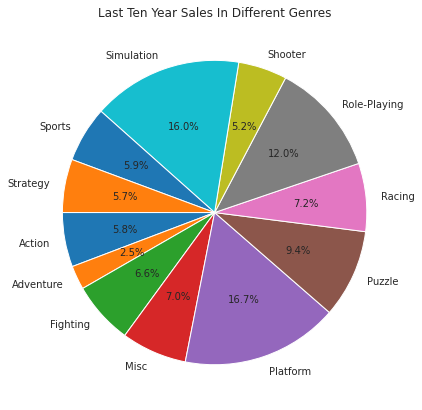

In [65]:
plt.figure(figsize=(15,7))
plt.title('Last Ten Year Sales In Different Genres')
plt.pie(allt_genres.Average, labels=allt_genres.index, autopct='%1.1f%%', startangle=180);

In the pie chart above you can see the genres and their average sales in million in the last 10 years.Considering this chart we can say that choosing a platfrom game will be most suitable for Japanese market though we can give simulation genre a chance too.Let's decide which platform we must have a deal with.

In [66]:
platform_chs=japan_df[japan_df.Genre == 'Platform'][['Platform','JP_Sales']]
counts=platform_chs.Platform.value_counts()
platform_chs=platform_chs.groupby('Platform').sum()
platform_chs['Count']=counts
platform_chs['Average']=platform_chs.JP_Sales/platform_chs.Count

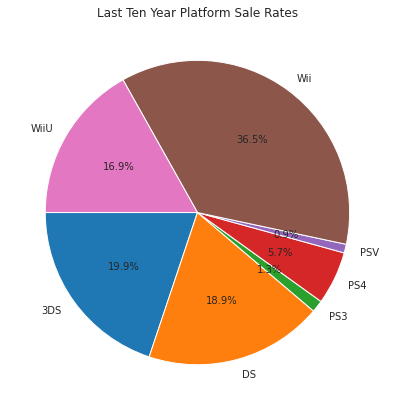

In [69]:
plt.figure(figsize=(15,7))
plt.title('Last Ten Year Platform Sale Rates')
plt.pie(platform_chs.Average, labels=platform_chs.index, autopct='%1.1f%%', startangle=180);

And with this chart it's obvious that Wii made a great contribution to the video game sales in Japan.\
\
**Ans3:Releasing a platform game in Wii platform will probably be good choise in Japanese market.**

### Q4:Which publisher have a better average sell rate in action genre in the last 5 years?

In [89]:
action=sales_raw_df[(sales_raw_df.Genre=='Action') & (sales_raw_df.Year > 2015)][['Publisher','Global_Sales']]
counts=action.Publisher.value_counts()
action=action.groupby('Publisher').sum()
action['Count']=counts
action['Average']=action.Global_Sales/action.Count
action=action.sort_values('Average',ascending=False).head(20)

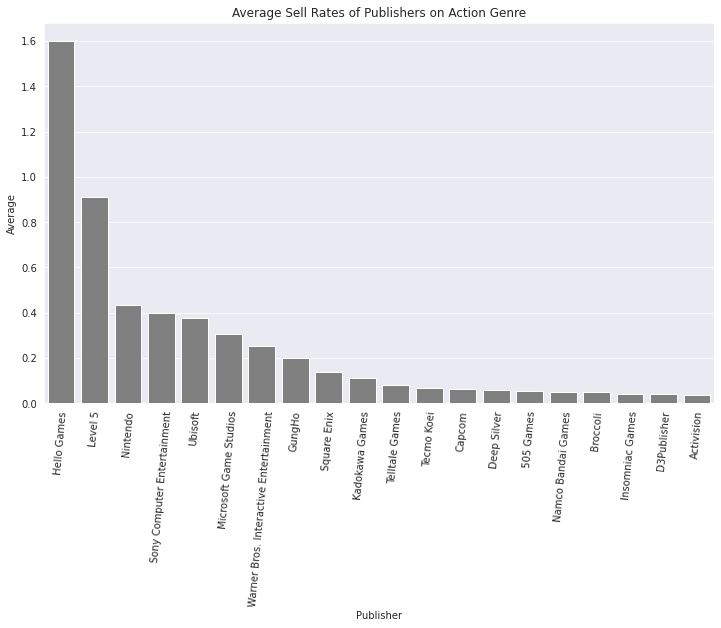

In [90]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=85)
plt.title('Average Sell Rates of Publishers on Action Genre')
sns.barplot(action.index, action.Average,color='grey');

**Ans4:Here you can see Hello Games has the best overall sale rate in the last 5 years,so releasing an action game with this publisher would probably be a good choise thinking the net growth.**

## Inferences and Conclusion


From this project I learned that even though the most played genre -which is action- doesn't change easily , game publishers tend to use different platforms following the changes in technology and player preferences.I also saw that follow up games are selling well between the old users but total number of sales are decreasing in each release.

Japan sales seems to be the weak link among 3 worldwide bestseller markets,as I mentioned in the question section to enhance the capasity of te market choosing to release platform games in Wii format is probably a good idea.

Overall,data set confirms that video game sales are getting lower and lower with time,which is probably caused by free or cheap game alternatives created for computers and mobile phones.Decreasing the prices or creating cheaper environments for video games would be helpfull to publishers.

## References 

In this project I used the knowledge I gained from the zero to pandas course by jovian.ml,I also took my data set from [kaggle](https://www.kaggle.com/gregorut/videogamesales) and the mario [image](https://leadergamer.com.tr/wp-content/uploads/2020/10/Switch_SuperMarioBros35_Hero.jpg) from Google.

In [5]:
project_name='video_games_sales'

In [6]:
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "gunaydin-kevser/video-games-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/gunaydin-kevser/video-games-sales


'https://jovian.ml/gunaydin-kevser/video-games-sales'